## Importing required libraries

In [1]:
!pip install torchsummary
from __future__ import print_function
import numpy as np
import torch
import torch.optim as optim
from torchvision import transforms
from visualize import show_class_samples, show_random_samples,show_image_rgb,show_accuracy_loss,show_misclassified_img
from utils import data_loader
from model import dynamic_norm_cnn, model_summary, train, test, train_test_loss_accuracy
import model
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Defining the transform, selecting the device type and loading the train/test data using data loader

In [2]:
#transforms that need to be applied
transform_values = [transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]

SEED = 1
# Selecting device as CUDA/CPU
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# For reproducibility
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)

# arguments to dataloader
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader are initialized
train_loader, test_loader, classes = data_loader(transform_values, dataloader_args)


CUDA Available? True


100%|██████████| 170498071/170498071 [00:01<00:00, 101029470.65it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Unique classes of images are: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Random images from the CIFAR10 dataset

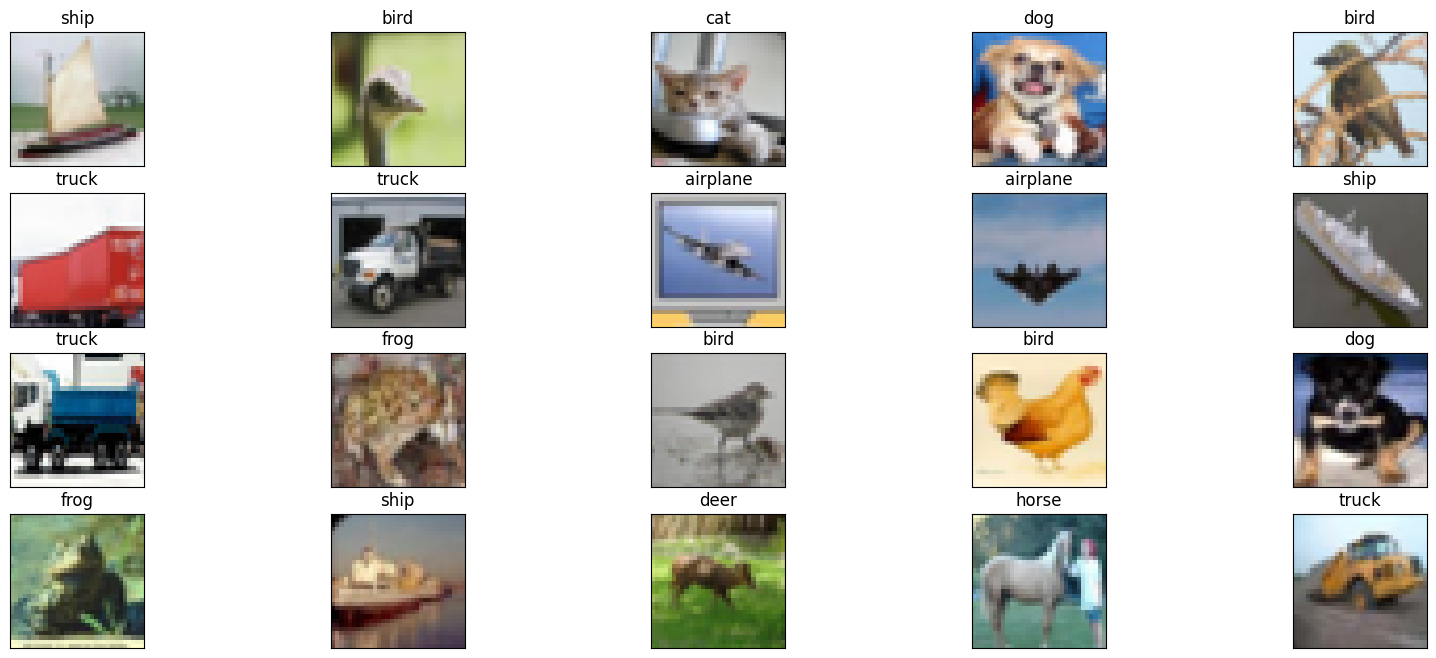

In [3]:
show_random_samples(train_loader, classes)

## Images from each class in the CIFAR10 dataset

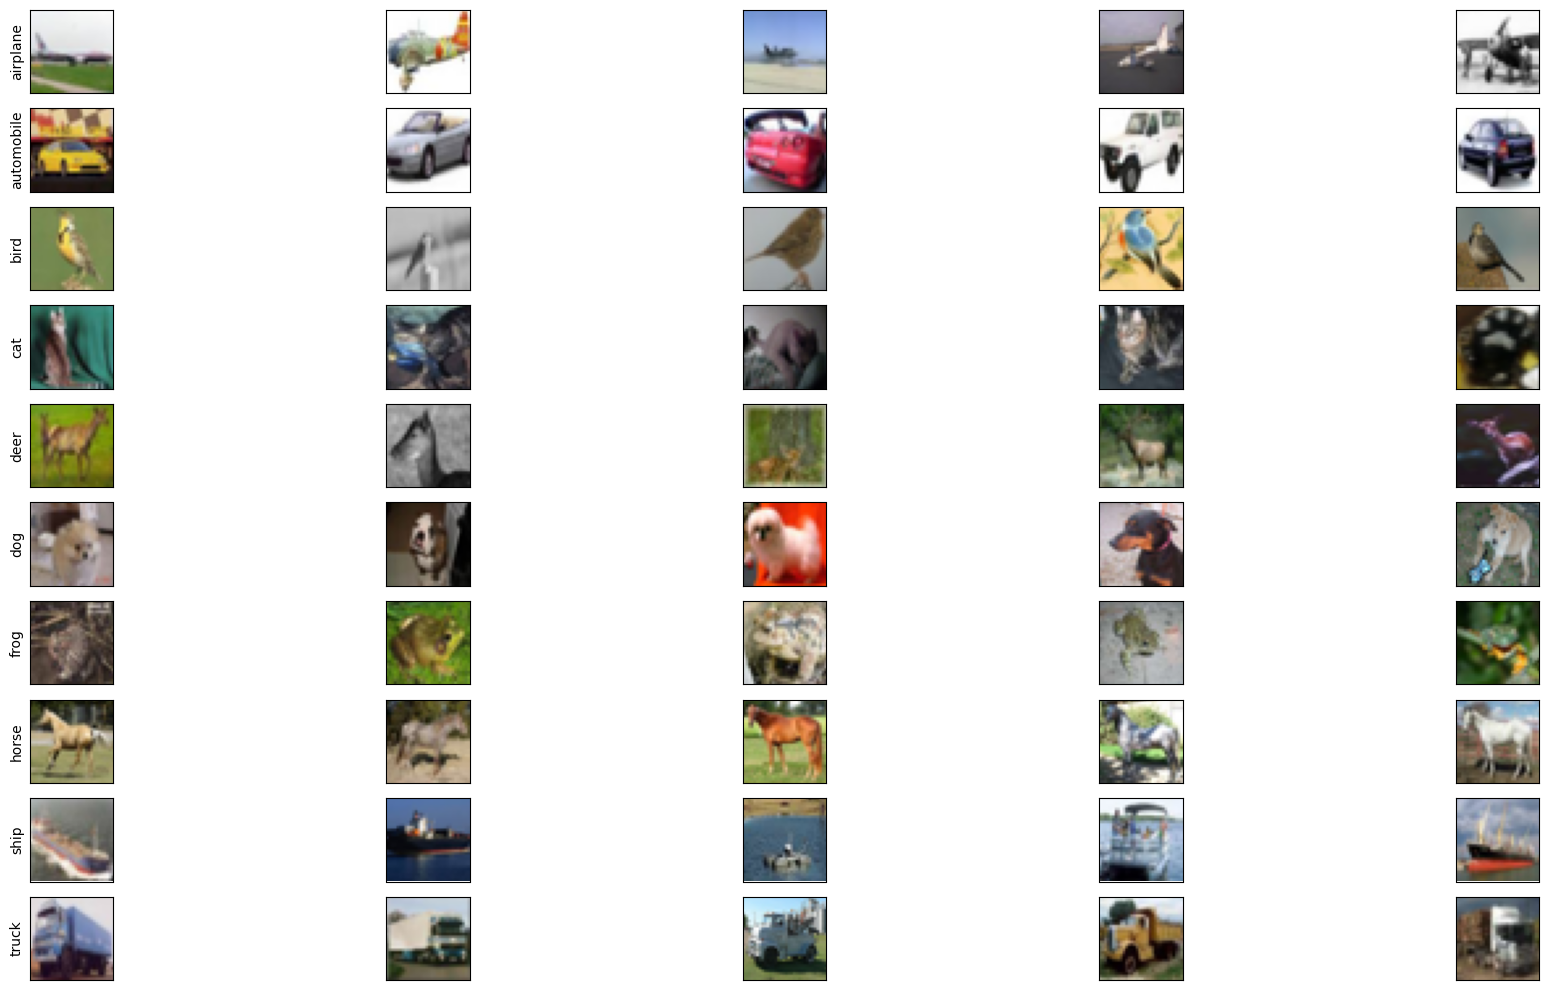

In [4]:
show_class_samples(train_loader, classes)

## Displaying an image and the corresponing red, green and blue channel

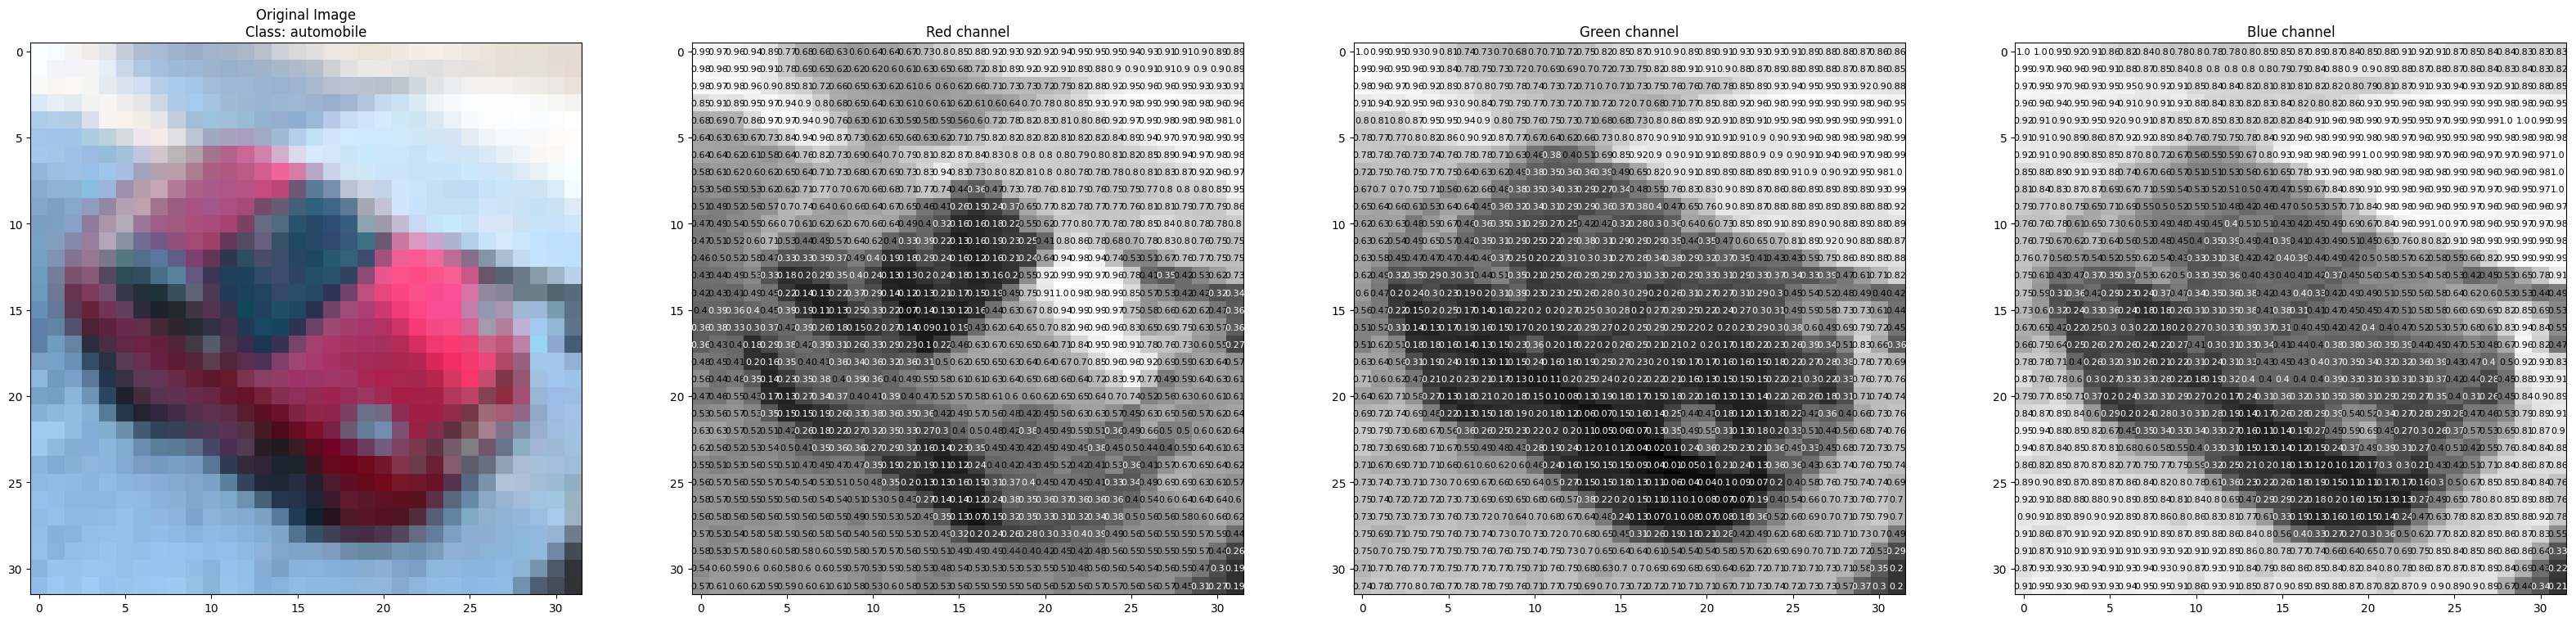

In [5]:
show_image_rgb(train_loader, classes)

## Defining the model and printing the model summary

The model can be used to apply batch, group and layer normalization.


*   For batch normalization, set the "use_batch_norm" flag to True
    ```
      model = Net(use_batch_norm=True).to(device)
    ```
*   For  group normalization, set the "use_group_norm" flag to True
    ```
    model = Net(use_group_norm=True, num_groups=2).to(device)
    ```
*   For layer normalization, set the "use_layer_norm" flag to True
    ```
    model = Net(use_layer_norm=True).to(device)
    ```

In [6]:
cnn_model = dynamic_norm_cnn(use_batch_norm=True).to(device)
# model = Net(use_group_norm=True, num_groups=2).to(device)
# model = Net(use_layer_norm=True).to(device)

# Model Summary
model_summary(cnn_model, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 30, 30]             270
              ReLU-2           [-1, 10, 30, 30]               0
       BatchNorm2d-3           [-1, 10, 30, 30]              20
           Dropout-4           [-1, 10, 30, 30]               0
            Conv2d-5           [-1, 20, 28, 28]           1,800
              ReLU-6           [-1, 20, 28, 28]               0
       BatchNorm2d-7           [-1, 20, 28, 28]              40
           Dropout-8           [-1, 20, 28, 28]               0
            Conv2d-9           [-1, 10, 28, 28]             200
        MaxPool2d-10           [-1, 10, 14, 14]               0
           Conv2d-11           [-1, 20, 14, 14]           1,800
             ReLU-12           [-1, 20, 14, 14]               0
      BatchNorm2d-13           [-1, 20, 14, 14]              40
          Dropout-14           [-1, 20,

## Defining the optimizer and iterating the train and test functions based on number of epochs

In [7]:
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(cnn_model, device, train_loader, optimizer, epoch)
    misclassified_images, misclassified_labels, misclassified_predictions = test(cnn_model, device, test_loader)
    print("\n")




EPOCH: 1


Batch_id=390: 100%|██████████| 391/391 [00:19<00:00, 19.86it/s]




EPOCH: 2


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.34it/s]




EPOCH: 3


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.18it/s]




EPOCH: 4


Batch_id=390: 100%|██████████| 391/391 [00:19<00:00, 20.40it/s]




EPOCH: 5


Batch_id=390: 100%|██████████| 391/391 [00:19<00:00, 19.89it/s]




EPOCH: 6


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.15it/s]




EPOCH: 7


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.12it/s]




EPOCH: 8


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.19it/s]




EPOCH: 9


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.15it/s]




EPOCH: 10


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 18.94it/s]




EPOCH: 11


Batch_id=390: 100%|██████████| 391/391 [00:19<00:00, 19.90it/s]




EPOCH: 12


Batch_id=390: 100%|██████████| 391/391 [00:19<00:00, 19.98it/s]




EPOCH: 13


Batch_id=390: 100%|██████████| 391/391 [00:19<00:00, 20.15it/s]




EPOCH: 14


Batch_id=390: 100%|██████████| 391/391 [00:19<00:00, 19.89it/s]




EPOCH: 15


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.14it/s]




EPOCH: 16


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]




EPOCH: 17


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.14it/s]




EPOCH: 18


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.12it/s]




EPOCH: 19


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.24it/s]




EPOCH: 20


Batch_id=390: 100%|██████████| 391/391 [00:20<00:00, 19.31it/s]


In [8]:
# display train/test accuracies
train_test_loss_accuracy(EPOCHS).style.hide(axis='index')



epoch,train_loss,train_accuracy,test_loss,test_accuracy
1,1.500000,39.440000,1.440000,47.360000
2,1.280000,53.230000,1.380000,52.520000
3,1.230000,58.290000,1.120000,60.060000
4,1.240000,61.540000,1.050000,62.240000
5,0.950000,64.000000,0.970000,65.330000
6,0.950000,66.040000,0.920000,67.550000
7,1.160000,67.460000,0.910000,67.820000
8,0.820000,68.620000,0.920000,67.700000
9,1.030000,69.800000,0.890000,68.950000
10,0.610000,70.860000,0.820000,71.050000


## Plotting train/test accuracies and losses

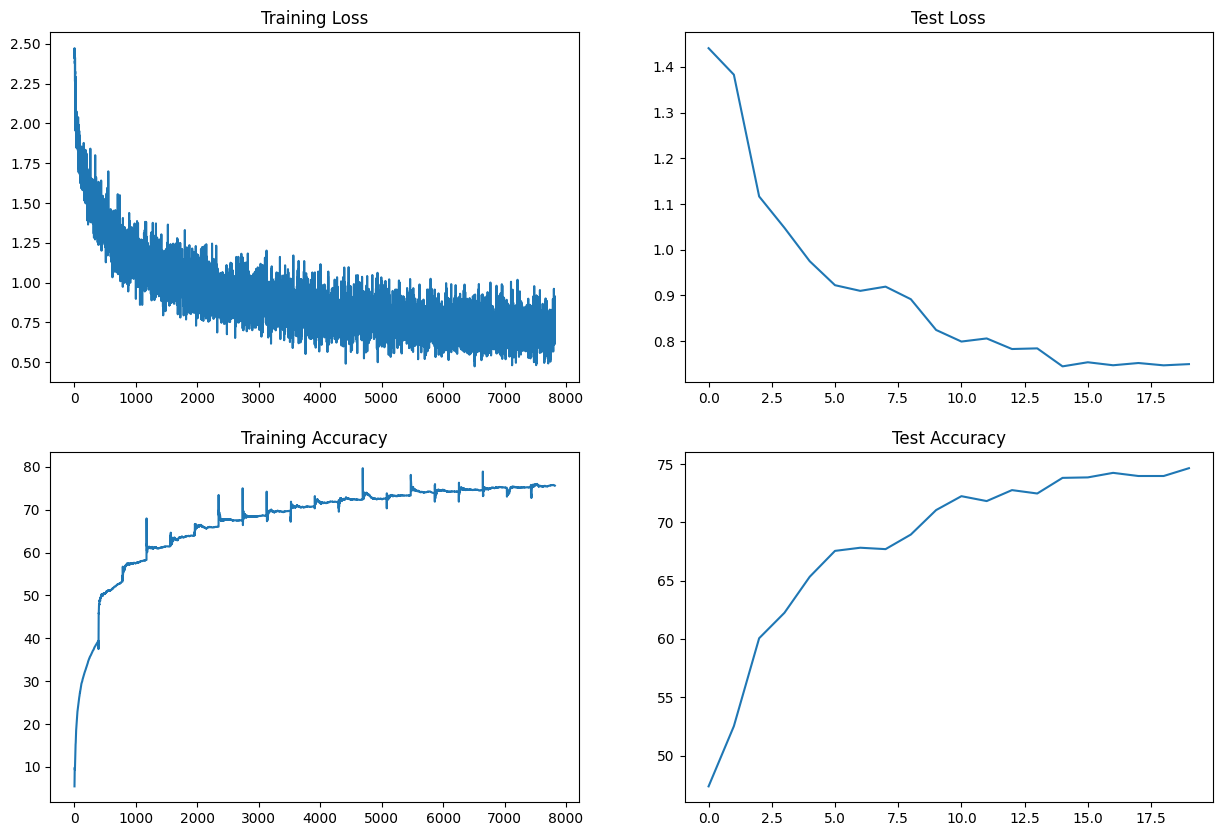

In [9]:
show_accuracy_loss(model.train_losses, model.train_acc, model.test_losses, model.test_acc)

## Plotting miscalssified images after prediction

Misclassified Images:


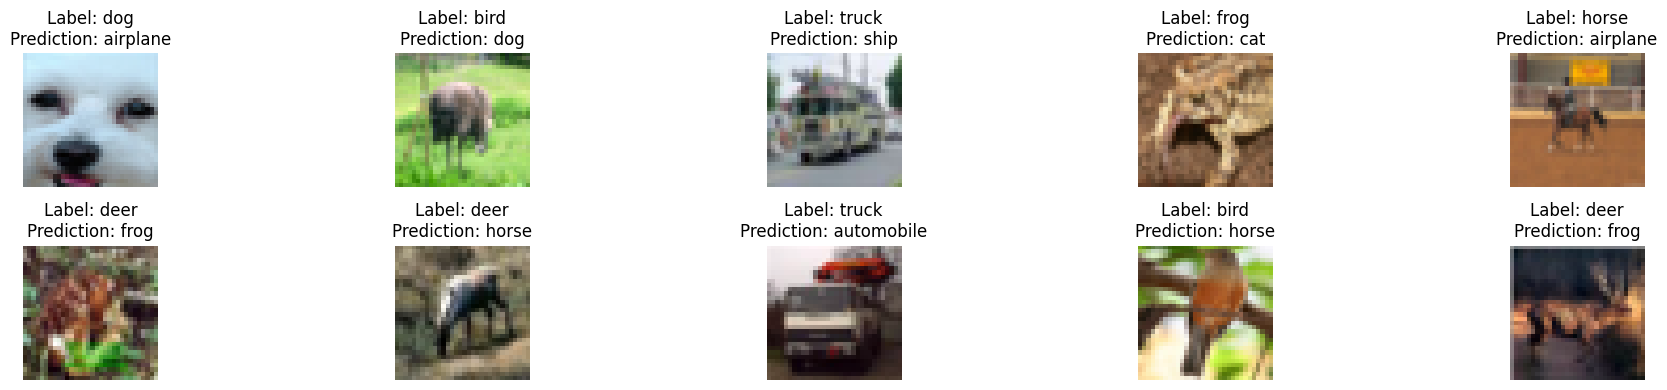

In [10]:
show_misclassified_img(misclassified_images, misclassified_labels, misclassified_predictions, classes)